In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -r /content/drive/MyDrive/Colab\ Notebooks/data\ bootcamp/EDA

previous_application.csv  EDA.ipynb  application_data.csv


In [3]:
%cd /content/drive/MyDrive/Colab\ Notebooks/data\ bootcamp/EDA

/content/drive/MyDrive/Colab Notebooks/data bootcamp/EDA


In [ ]:
!ls

application_data.csv  EDA.ipynb  previous_application.csv


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
app = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

In [ ]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GRP,CREDIT_GRP,AGE_GRP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,200-300k,300-500k,25-34
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,200-300k,>=1.2m,45-54
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,<=100k,100-200k,45-54
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,100-150k,300-500k,45-54
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,100-150k,500-800k,45-54


In [ ]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



TARGET counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Default rate (TARGET=1): 0.08072881945686496


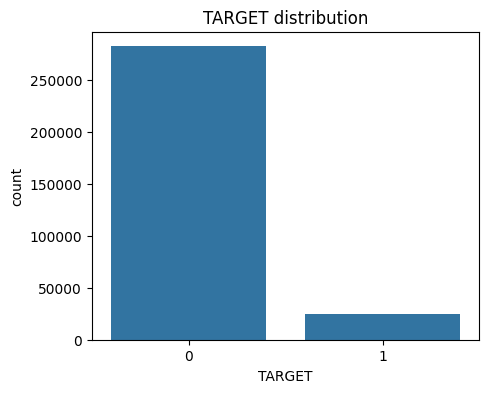

In [ ]:
print("\nTARGET counts:")
print(app["TARGET"].value_counts())
print("\nDefault rate (TARGET=1):", app["TARGET"].mean())

plt.figure(figsize=(5,4))
sns.countplot(data=app, x="TARGET")
plt.title("TARGET distribution")
plt.show()

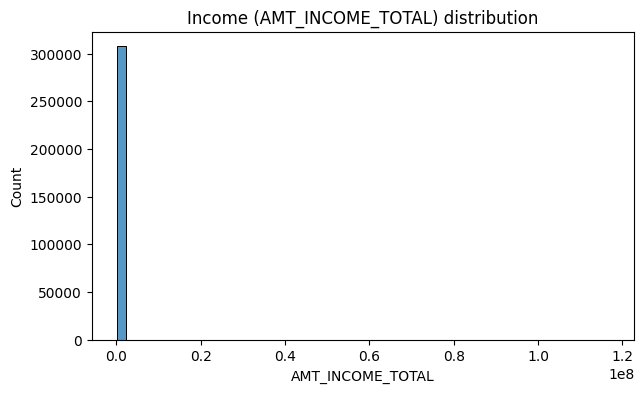

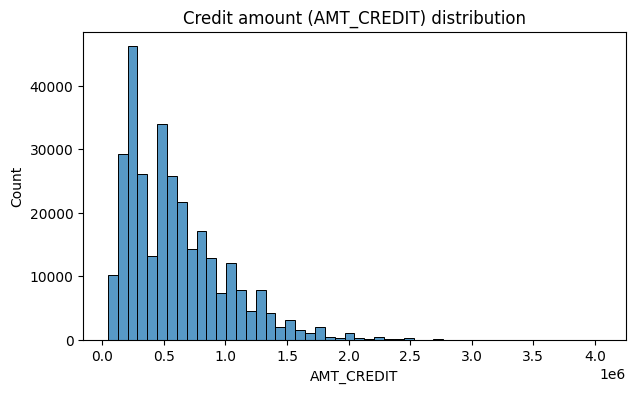

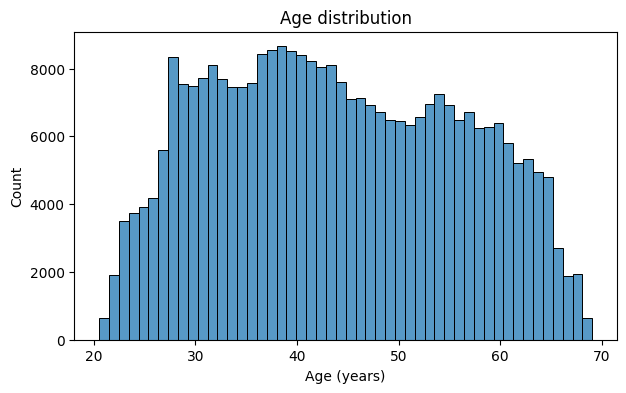

In [ ]:
# Income distribution
plt.figure(figsize=(7,4))
sns.histplot(data=app, x="AMT_INCOME_TOTAL", bins=50)
plt.title("Income (AMT_INCOME_TOTAL) distribution")
plt.show()

# Credit amount distribution
plt.figure(figsize=(7,4))
sns.histplot(data=app, x="AMT_CREDIT", bins=50)
plt.title("Credit amount (AMT_CREDIT) distribution")
plt.show()

# Age distribution (from DAYS_BIRTH)
plt.figure(figsize=(7,4))
sns.histplot(x=(-app["DAYS_BIRTH"] / 365.25), bins=50)
plt.title("Age distribution")
plt.xlabel("Age (years)")
plt.show()


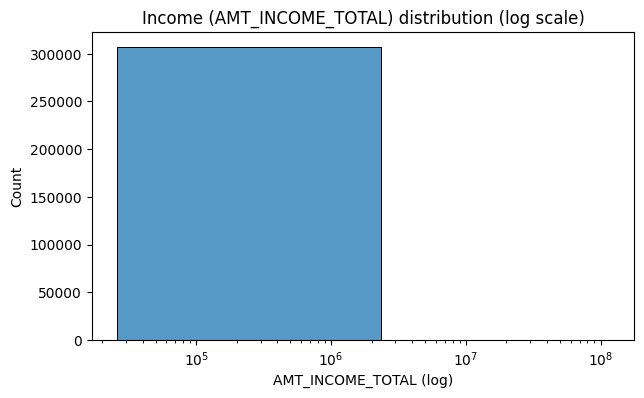

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=app, x="AMT_INCOME_TOTAL", bins=50)
plt.xscale("log")
plt.title("Income (AMT_INCOME_TOTAL) distribution (log scale)")
plt.xlabel("AMT_INCOME_TOTAL (log)")
plt.show()


In [ ]:
income_bins = [0, 100000, 150000, 200000, 300000, 500000, 1000000, float("inf")]
income_labels = ["<=100k", "100-150k", "150-200k", "200-300k", "300-500k", "500k-1m", ">=1m"]
app["INCOME_GRP"] = pd.cut(app["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels, include_lowest=True)

credit_bins = [0, 100000, 200000, 300000, 500000, 800000, 1200000, float("inf")]
credit_labels = ["<=100k", "100-200k", "200-300k", "300-500k", "500-800k", "800k-1.2m", ">=1.2m"]
app["CREDIT_GRP"] = pd.cut(app["AMT_CREDIT"], bins=credit_bins, labels=credit_labels, include_lowest=True)

age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
app["AGE_GRP"] = pd.cut((-app["DAYS_BIRTH"] / 365.25), bins=age_bins, labels=age_labels, include_lowest=True)

app["INCOME_GRP"].value_counts(dropna=False).sort_index()



,count
INCOME_GRP,
<=100k,63698
100-150k,91591
150-200k,64307
200-300k,65176
300-500k,20037
500k-1m,2452
>=1m,250


In [ ]:
app["CREDIT_GRP"].value_counts(dropna=False).sort_index()


,count
CREDIT_GRP,
<=100k,6004
100-200k,30140
200-300k,54813
300-500k,58376
500-800k,77474
800k-1.2m,52845
>=1.2m,27859


In [ ]:
app["AGE_GRP"].value_counts(dropna=False).sort_index()

,count
AGE_GRP,
18-24,12233
25-34,72429
35-44,84261
45-54,70190
55-64,60522
65+,7876


/tmp/ipython-input-4277996042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_sum = app.groupby("INCOME_GRP")["TARGET"].mean()


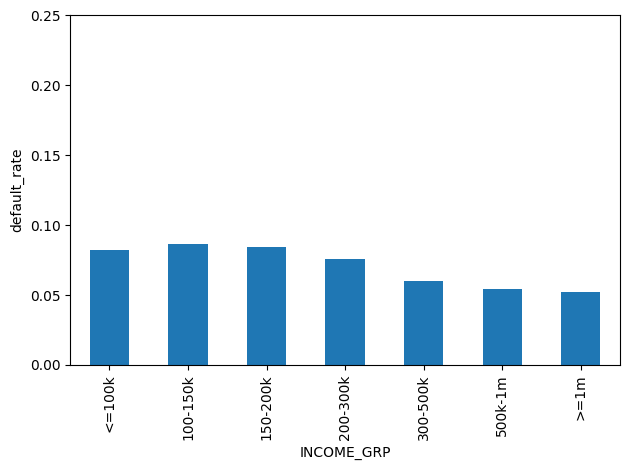

In [ ]:
income_sum = app.groupby("INCOME_GRP")["TARGET"].mean()
income_sum.plot(kind="bar")
plt.ylim(0, 0.25)
plt.ylabel("default_rate")
plt.xlabel("INCOME_GRP")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2781498009.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_sum = app.groupby("CREDIT_GRP")["TARGET"].mean()


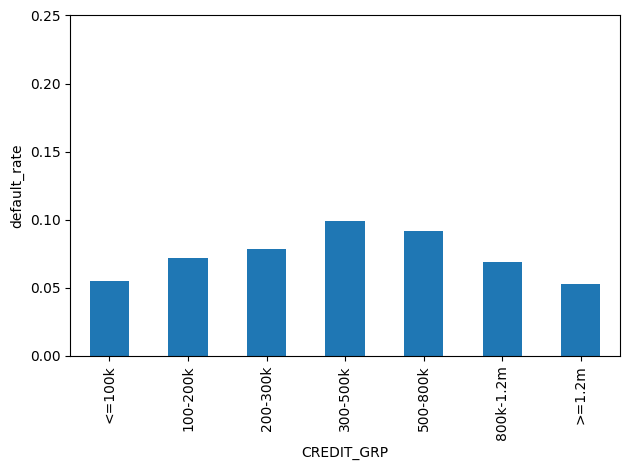

In [ ]:
credit_sum = app.groupby("CREDIT_GRP")["TARGET"].mean()
credit_sum.plot(kind="bar")
plt.ylim(0, 0.25)
plt.ylabel("default_rate")
plt.xlabel("CREDIT_GRP")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3470357480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sum = app.groupby("AGE_GRP")["TARGET"].mean()


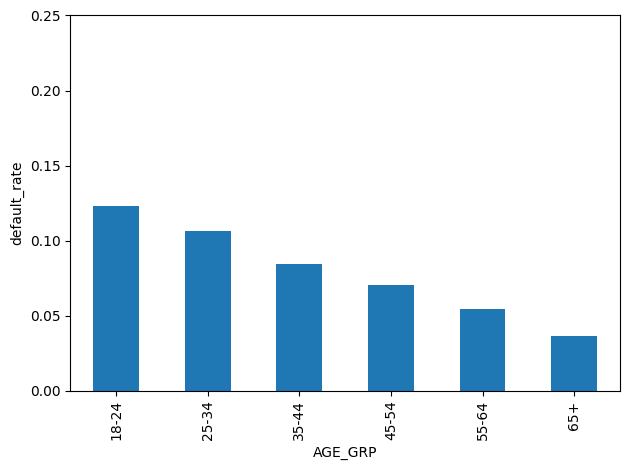

In [ ]:
age_sum = app.groupby("AGE_GRP")["TARGET"].mean()
age_sum.plot(kind="bar")
plt.ylim(0, 0.25)
plt.ylabel("default_rate")
plt.xlabel("AGE_GRP")
plt.tight_layout()
plt.show()

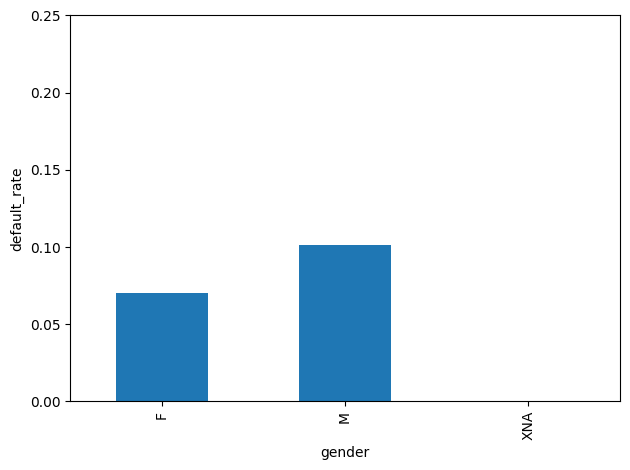

In [ ]:
gender_sum = app.groupby("CODE_GENDER")["TARGET"].mean()
gender_sum.plot(kind="bar")
plt.ylim(0, 0.25)
plt.ylabel("default_rate")
plt.xlabel("gender")
plt.tight_layout()
plt.show()

/tmp/ipython-input-723576464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = (app.groupby(["AGE_GRP", "CODE_GENDER"], as_index=False)["TARGET"].mean().rename(columns={"TARGET": "default_rate"}))


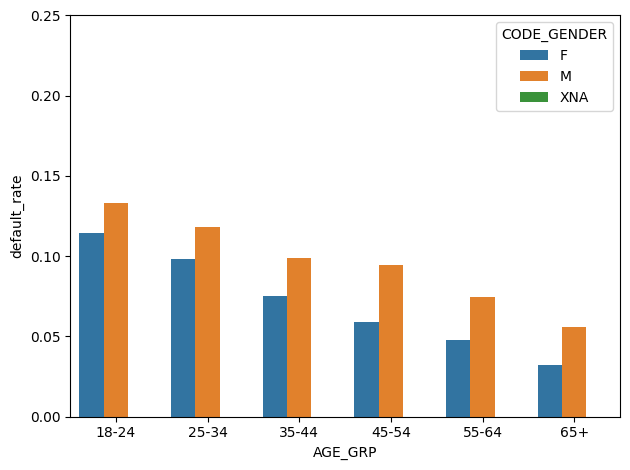

In [ ]:
age_gender = (app.groupby(["AGE_GRP", "CODE_GENDER"], as_index=False)["TARGET"].mean().rename(columns={"TARGET": "default_rate"}))
sns.barplot(data=age_gender,x="AGE_GRP",y="default_rate",hue="CODE_GENDER")
plt.ylim(0, 0.25)
plt.ylabel("default_rate")
plt.xlabel("AGE_GRP")
plt.tight_layout()
plt.show()


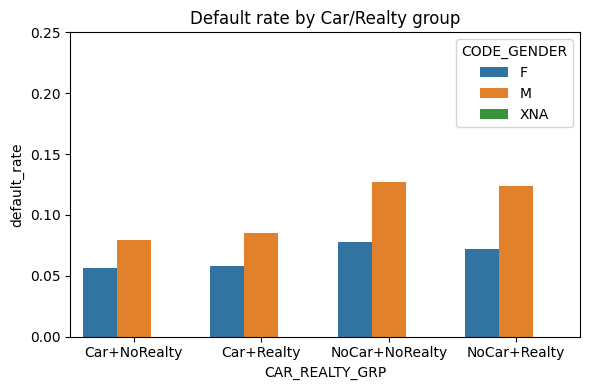

In [ ]:
app["CAR_REALTY_GRP"] = np.select([
        (app["FLAG_OWN_CAR"] == "Y") & (app["FLAG_OWN_REALTY"] == "Y"),
        (app["FLAG_OWN_CAR"] == "N") & (app["FLAG_OWN_REALTY"] == "Y"),
        (app["FLAG_OWN_CAR"] == "Y") & (app["FLAG_OWN_REALTY"] == "N"),
        (app["FLAG_OWN_CAR"] == "N") & (app["FLAG_OWN_REALTY"] == "N"),],
    ["Car+Realty", "NoCar+Realty", "Car+NoRealty", "NoCar+NoRealty"],
    default=None
)

s = app.groupby(["CAR_REALTY_GRP","CODE_GENDER"],as_index=False)["TARGET"].agg(count="size", default_rate="mean").reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=s, x="CAR_REALTY_GRP", y="default_rate", hue="CODE_GENDER")
plt.ylim(0, 0.25)
plt.title("Default rate by Car/Realty group")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1161365215.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app_prev.groupby("PREV_CNT_GRP")["TARGET"].mean().reset_index()


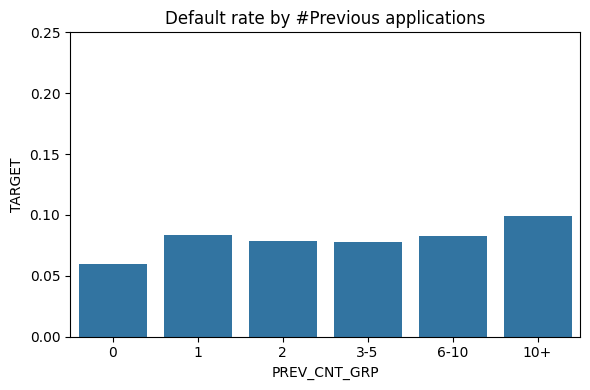

/tmp/ipython-input-1161365215.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app_prev.groupby("PREV_REFUSED_GRP")["TARGET"].mean().reset_index()


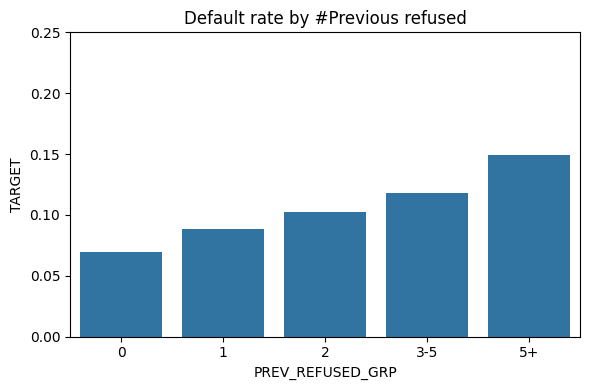

/tmp/ipython-input-1161365215.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app_prev.dropna(subset=["APPROVAL_RATE_GRP"]).groupby("APPROVAL_RATE_GRP")["TARGET"].mean().reset_index()


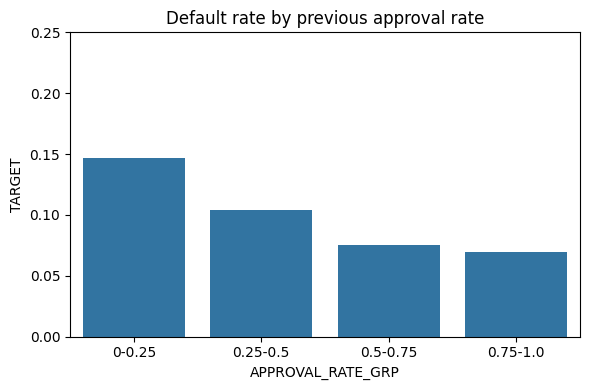

In [ ]:

prev_sum = (prev.groupby("SK_ID_CURR")["NAME_CONTRACT_STATUS"]
            .value_counts().unstack(fill_value=0))
prev_sum["PREV_CNT"] = prev_sum.sum(axis=1)
prev_sum["PREV_APPROVED_CNT"] = prev_sum.get("Approved", 0)
prev_sum["PREV_REFUSED_CNT"] = prev_sum.get("Refused", 0)
prev_sum = prev_sum[["PREV_CNT","PREV_APPROVED_CNT","PREV_REFUSED_CNT"]].reset_index()

app_prev = app.merge(prev_sum, on="SK_ID_CURR", how="left").fillna({"PREV_CNT":0,"PREV_APPROVED_CNT":0,"PREV_REFUSED_CNT":0})


app_prev["PREV_CNT_GRP"] = pd.cut(app_prev["PREV_CNT"], [-1,0,1,2,5,10,10**9], labels=["0","1","2","3-5","6-10","10+"])
s = app_prev.groupby("PREV_CNT_GRP")["TARGET"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=s, x="PREV_CNT_GRP", y="TARGET")
plt.ylim(0, 0.25)
plt.title("Default rate by #Previous applications")
plt.tight_layout()
plt.show()

app_prev["PREV_REFUSED_GRP"] = pd.cut(app_prev["PREV_REFUSED_CNT"], [-1,0,1,2,5,10**9], labels=["0","1","2","3-5","5+"])
s = app_prev.groupby("PREV_REFUSED_GRP")["TARGET"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=s, x="PREV_REFUSED_GRP", y="TARGET")
plt.ylim(0, 0.25)
plt.title("Default rate by #Previous refused")
plt.tight_layout()
plt.show()


app_prev["PREV_APPROVAL_RATE"] = app_prev["PREV_APPROVED_CNT"] / app_prev["PREV_CNT"].replace(0, np.nan)
app_prev["APPROVAL_RATE_GRP"] = pd.cut(app_prev["PREV_APPROVAL_RATE"], [0,0.25,0.5,0.75,1.00001], labels=["0-0.25","0.25-0.5","0.5-0.75","0.75-1.0"])
s = app_prev.dropna(subset=["APPROVAL_RATE_GRP"]).groupby("APPROVAL_RATE_GRP")["TARGET"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=s, x="APPROVAL_RATE_GRP", y="TARGET")
plt.ylim(0, 0.25)
plt.title("Default rate by previous approval rate")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2817604255.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app.groupby("PAYMENT_RATIO_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})


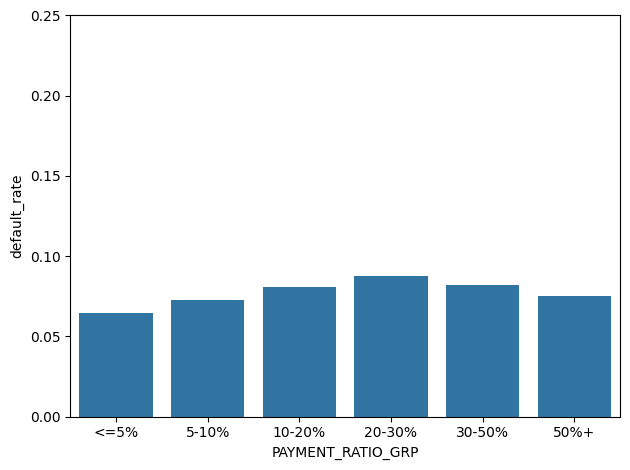

In [ ]:
app["PAYMENT_RATIO"] = app["AMT_ANNUITY"] / app["AMT_INCOME_TOTAL"]
app["PAYMENT_RATIO_GRP"] = pd.cut(app["PAYMENT_RATIO"], [0,0.05,0.1,0.2,0.3,0.5,10], labels=["<=5%","5-10%","10-20%","20-30%","30-50%","50%+"])

s = app.groupby("PAYMENT_RATIO_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})
sns.barplot(data=s, x="PAYMENT_RATIO_GRP", y="default_rate")
plt.ylim(0,0.25); plt.tight_layout(); plt.show()


/tmp/ipython-input-4088963944.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app.groupby("CREDIT_INCOME_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})


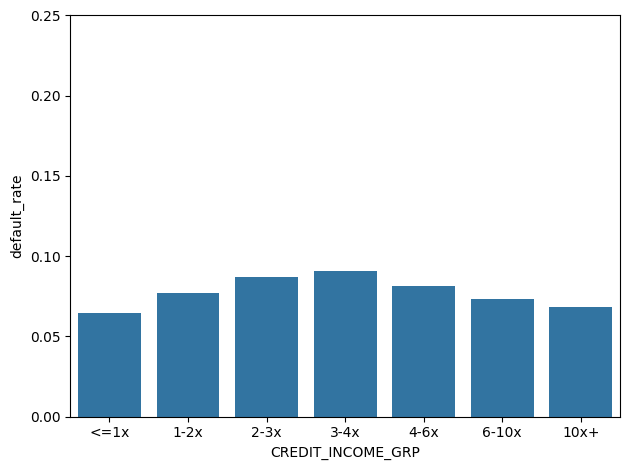

In [ ]:
app["CREDIT_INCOME"] = app["AMT_CREDIT"] / app["AMT_INCOME_TOTAL"]
app["CREDIT_INCOME_GRP"] = pd.cut(app["CREDIT_INCOME"], [0,1,2,3,4,6,10,100], labels=["<=1x","1-2x","2-3x","3-4x","4-6x","6-10x","10x+"])

s = app.groupby("CREDIT_INCOME_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})
sns.barplot(data=s, x="CREDIT_INCOME_GRP", y="default_rate")
plt.ylim(0,0.25); plt.tight_layout(); plt.show()


/tmp/ipython-input-2786021952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app.groupby("CREDIT_INCOME_GRP")["TARGET"].agg(count="size", default_rate="mean").reset_index()


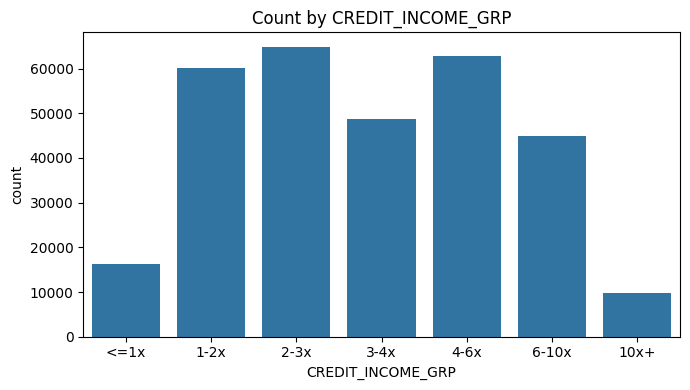

In [ ]:
s = app.groupby("CREDIT_INCOME_GRP")["TARGET"].agg(count="size", default_rate="mean").reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=s, x="CREDIT_INCOME_GRP", y="count")
plt.title("Count by CREDIT_INCOME_GRP")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1367167933.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = app.groupby("EMPLOY_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})


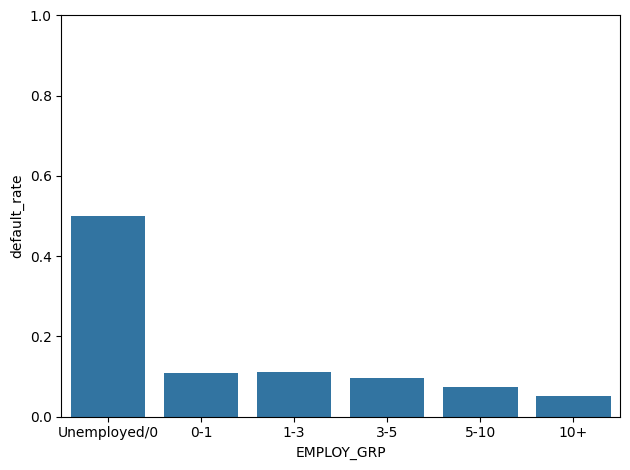

In [ ]:
app["DAYS_EMPLOYED"] = app["DAYS_EMPLOYED"]
app["EMPLOY_YEARS"] = -app["DAYS_EMPLOYED"] / 365.25
app["EMPLOY_GRP"] = pd.cut(app["EMPLOY_YEARS"], [-1,0,1,3,5,10,50], labels=["Unemployed/0","0-1","1-3","3-5","5-10","10+"])

s = app.groupby("EMPLOY_GRP", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})
sns.barplot(data=s, x="EMPLOY_GRP", y="default_rate")
plt.ylim(0,1); plt.tight_layout(); plt.show()


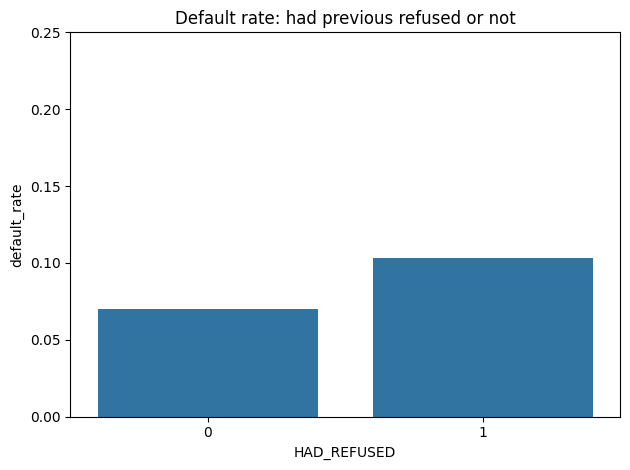

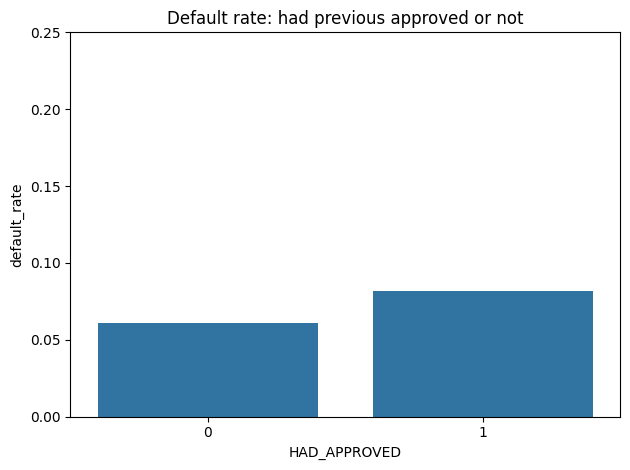

In [ ]:
app_prev["HAD_REFUSED"] = (app_prev["PREV_REFUSED_CNT"] > 0).astype(int)
app_prev["HAD_APPROVED"] = (app_prev["PREV_APPROVED_CNT"] > 0).astype(int)

s = app_prev.groupby("HAD_REFUSED", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})
sns.barplot(data=s, x="HAD_REFUSED", y="default_rate")
plt.ylim(0,0.25); plt.title("Default rate: had previous refused or not"); plt.tight_layout(); plt.show()

s = app_prev.groupby("HAD_APPROVED", as_index=False)["TARGET"].mean().rename(columns={"TARGET":"default_rate"})
sns.barplot(data=s, x="HAD_APPROVED", y="default_rate")
plt.ylim(0,0.25); plt.title("Default rate: had previous approved or not"); plt.tight_layout(); plt.show()
